# Healing ts approaches with missing value imputation

One of the problem of predictive clustering algorithm is missing points. Depends in our algorithm modification we can have more or less missing point, but after some time we can't predict any more because we have to much of them. For dealing with this problem we can apply healing algorithms. In this work we would like to try approaches discussed in article [Long-term missing value imputation for time series data using deep neural networks](https://link.springer.com/article/10.1007/s00521-022-08165-6). 


Having read the article carefully we have identified 3 approaches:
- [imputeTS](https://github.com/SteffenMoritz/imputeTS) R package, that provide several different imputation algorithm, from witch we choose 3 for now:
    1. missing Value Imputation by Interpolation,
    2. missing Value Imputation by Kalman Smoothing,
    3. missing Value Imputation by Weighted Moving Average;
- [mtsdi](https://cran.r-project.org/web/packages/mtsdi/index.html) R package, that provide EM algorithm based method for imputation of missing values in multivariate normal time series;
- Radial basis function network (RBF) with hyper parameters optimization (HPO).
Unfortunately there are no implementation provided for RBF with HPO, so we will try best hyperparameter from article and will compare them with `inputeTS` and `mtsdi`. 


For dealing with r packages we will use [rpy2](https://pypi.org/project/rpy2/) package and for RBF we will create our [torch](https://pytorch.org/docs/stable/torch.html) implementation.

## Try to run inputeTS

#### Import R packages

In [1]:
import numpy as np
import pandas as pd
import rpy2
import rpy2.robjects.packages as rpackages
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri, numpy2ri
import matplotlib.pyplot as plt

In [2]:
utils = rpackages.importr('utils')
utils.chooseCRANmirror(ind=1)

<rpy2.rinterface_lib.sexp.NULLType object at 0x132aec440> [RTYPES.NILSXP]

In [3]:
utils.install_packages('imputeTS')
utils.install_packages('mtsdi')

R[write to console]: пробую URL 'https://cloud.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.3/imputeTS_3.3.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2986088 bytes (2.8 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to cons


Скачанные бинарные пакеты находятся в
	/var/folders/p1/3m_zyv3s2wb5wryr6dgl_h7w0000gn/T//RtmpCQF63V/downloaded_packages


R[write to console]: пробую URL 'https://cloud.r-project.org/bin/macosx/big-sur-x86_64/contrib/4.3/mtsdi_0.3.5.tgz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 95832 bytes (93 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]


Скачанные бинарные пакеты находятся в
	/var/folders/p1/3m_zyv3s2wb5wryr6dgl_h7w0000gn/T//RtmpCQF63V/downloaded_packages


<rpy2.rinterface_lib.sexp.NULLType object at 0x132aec440> [RTYPES.NILSXP]

In [4]:
imputeTS = importr('imputeTS')
mtsdi = importr('mtsdi')

#### Make try healing of Lorenz series

In [5]:
dbscan_prediction = pd.read_csv('../data/dbscan_prediction.csv')
dbscan_prediction_true = pd.read_csv('../data/dbscan_prediction_true.csv')
pandas2ri.activate()
numpy2ri.activate()

In [6]:
def plot_filled(x_fill, method_name):    
    fig, ax = plt.subplots(1,2,figsize=(18, 8))
    ax[0].plot(dbscan_prediction_true['x'].to_numpy()[:100], c='black', label='test')
    ax[0].scatter(np.arange(100), x_fill[-100:], c='lime', label='dbscan pred', s=13)
    ax[0].legend()
    ax[0].set_xlabel('observation number')
    ax[0].set_ylabel('value')
    ax[0].set_title(f"Healed ts by {method_name}")

    ax[1].plot(dbscan_prediction_true['x'].to_numpy()[:100], c='black', label='test')
    ax[1].scatter(np.arange(100), x.to_numpy()[-100:], c='lime', label='dbscan pred', s=13)
    ax[1].legend()
    ax[1].set_xlabel('observation number')
    ax[1].set_ylabel('value')
    ax[1].set_title("Not healed ts")

    plt.show()

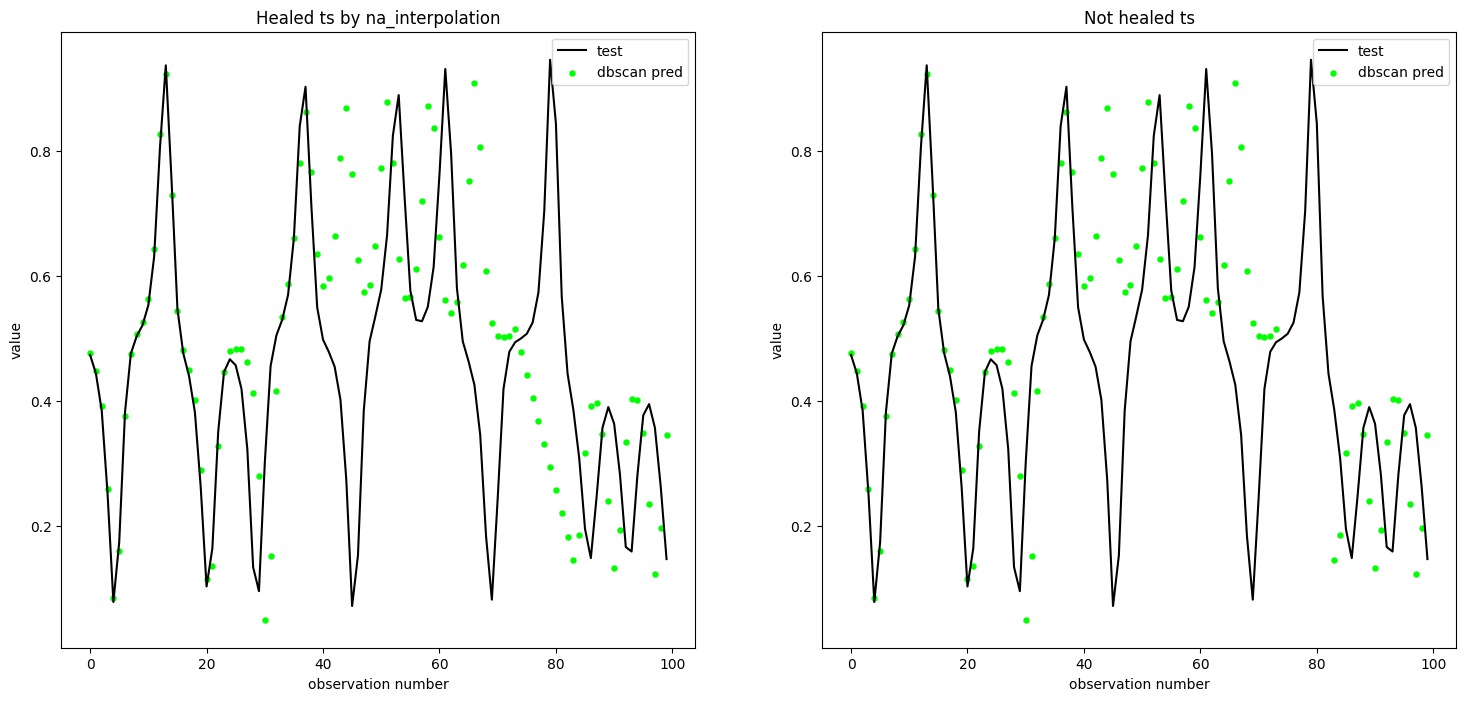

In [7]:
x = dbscan_prediction['x']
x_fill = imputeTS.na_interpolation(x)
plot_filled(x_fill, "na_interpolation")

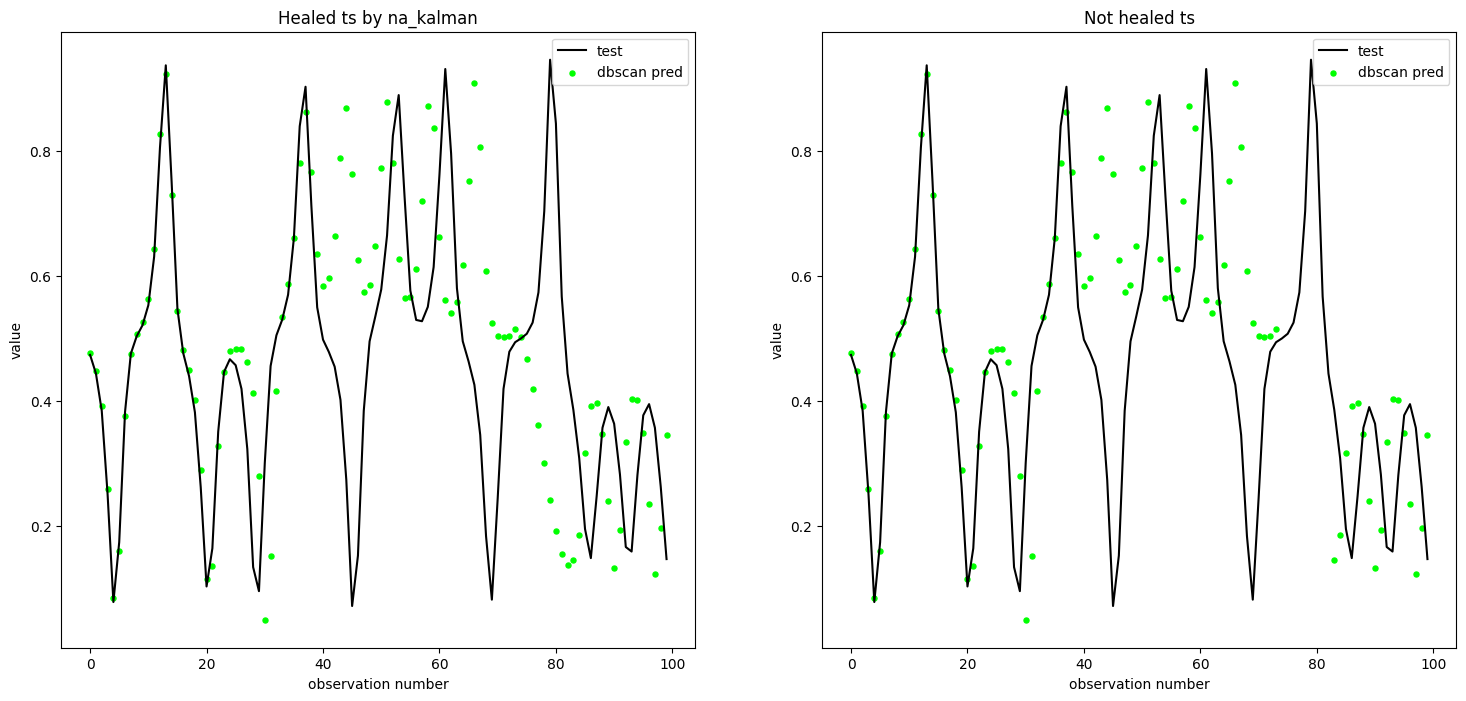

In [8]:
x_fill = imputeTS.na_kalman(x)
plot_filled(x_fill, "na_kalman")

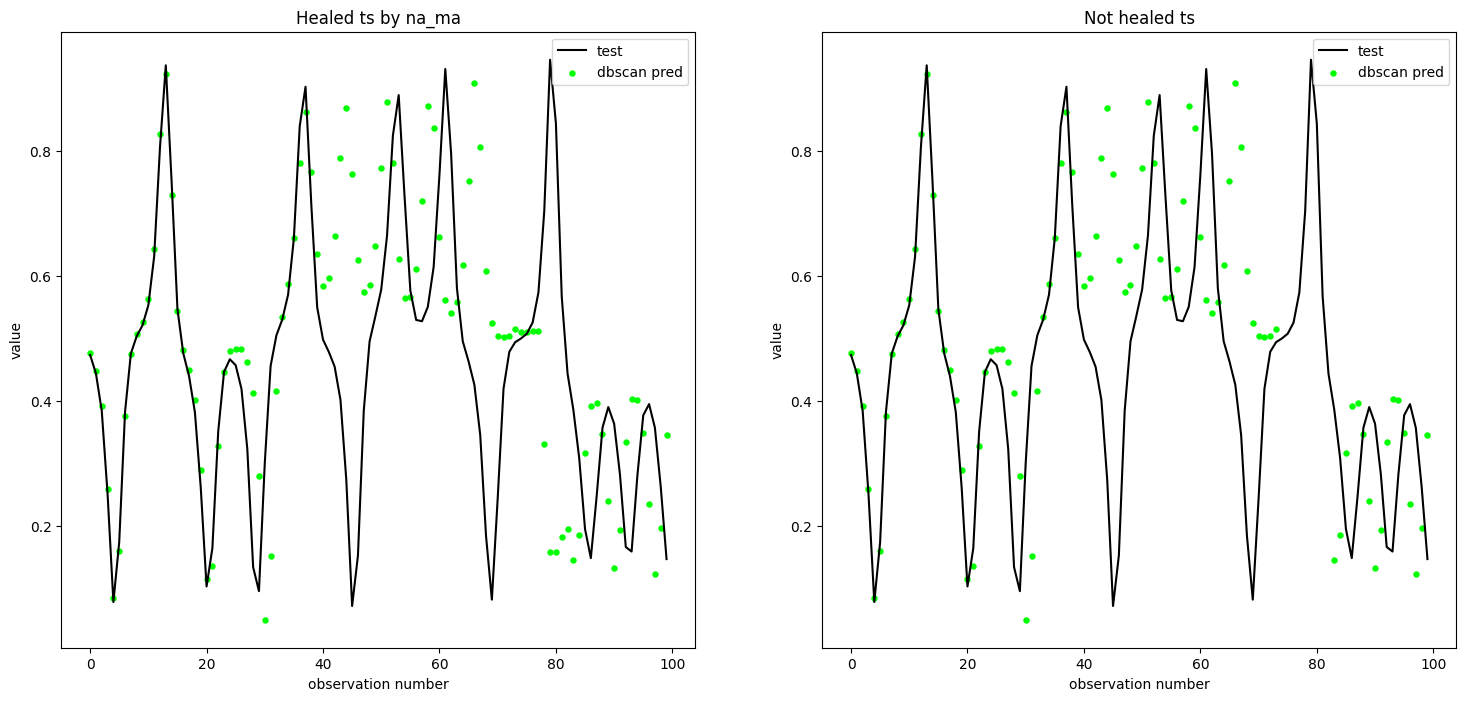

In [9]:
x_fill = imputeTS.na_ma(x)
plot_filled(x_fill, "na_ma")

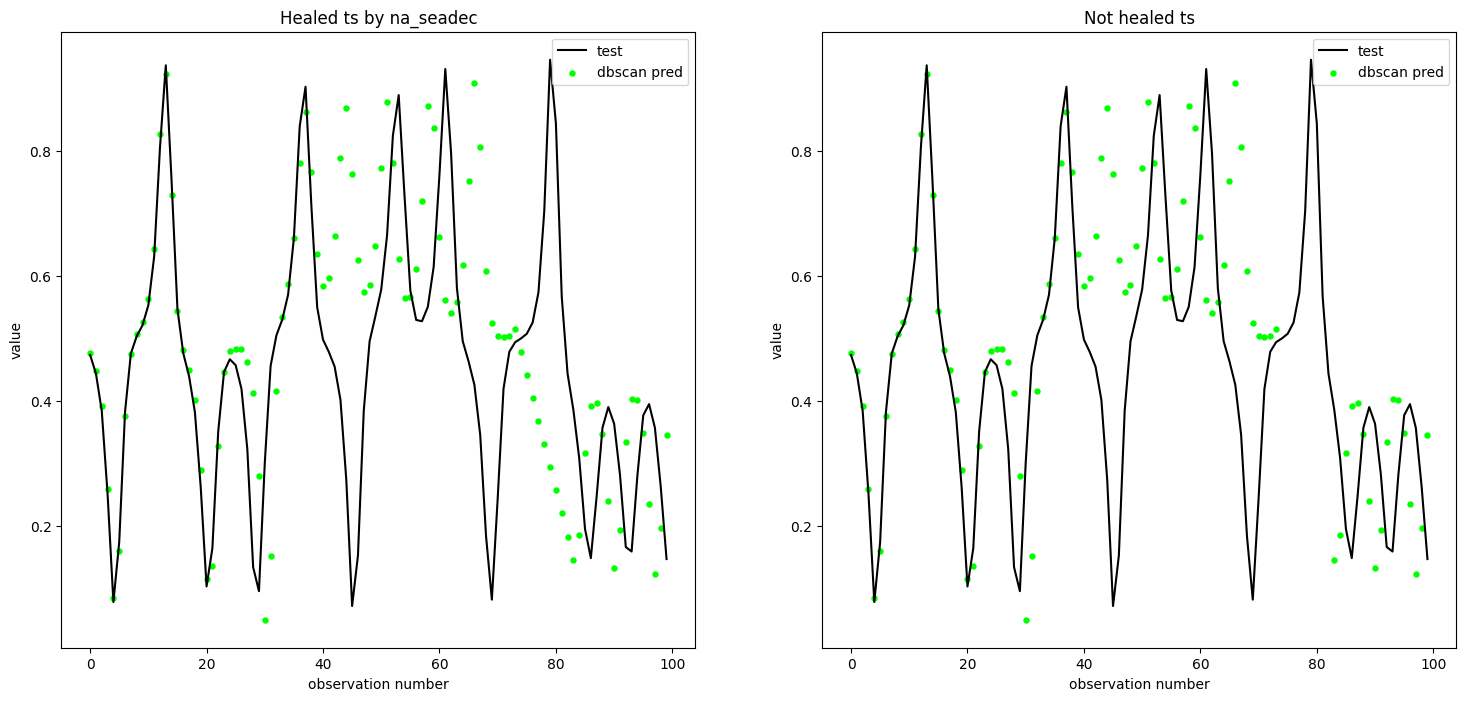

In [10]:
x_fill = imputeTS.na_seadec(x)
plot_filled(x_fill, "na_seadec")

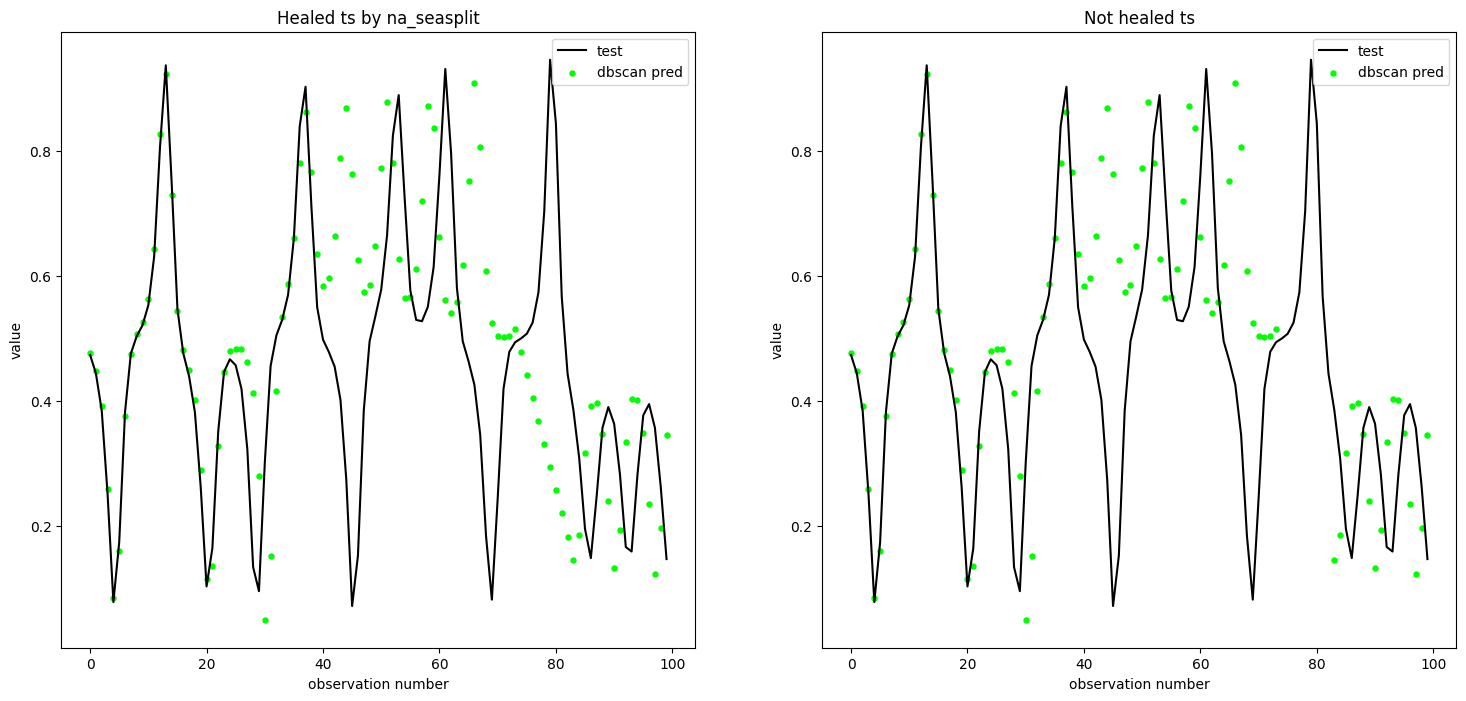

In [11]:
x_fill = imputeTS.na_seasplit(x)
plot_filled(x_fill, "na_seasplit")

## Utils

In [12]:
import numpy.typing as npt
from typing import Callable
from pypots.optim import Adam
from pypots.imputation import SAITS

def healing(X: npt.NDArray, method: str | Callable = 'Kalmon'):
    match method:
        case 'Kalmon':
            return imputeTS.na_kalman(X)
        case 'Interpolation':
            return imputeTS.na_interpolation(X)
        case 'WMA':
            return imputeTS.na_ma(X)
        case 'SAITS':
            optimizer = Adam(lr=0.001, weight_decay=1e-5)
            saits = SAITS(
                X.shape[0],
                1,
                n_layers=2,
                d_model=256,
                d_inner=128,
                n_heads=4,
                d_k=64,
                d_v=64,
                dropout=0.1,
                epochs=25,
                optimizer=optimizer,
            )
            X = X.to_numpy().reshape((1, X.shape[0], 1))
            saits.fit({"X": X})
            return saits.predict({"X": X[-100:]})


2023-12-26 16:01:41 [ERROR]: No module named 'torch_scatter'
Note torch_geometric is missing, please install it with 'pip install torch_geometric torch_scatter torch_sparse' or 'conda install -c pyg pyg pytorch-scatter pytorch-sparse'


In [13]:
lorenz = pd.read_csv("../data/lorentz_time_series.csv")
lorenz = lorenz['x'].to_numpy()[:10000]
lorenz.shape

(10000,)

In [14]:
def plot_filled(pred, true, healed, method_name, scaler=None, pred_name='entropy'):    
    _, ax = plt.subplots(1,1,figsize=(10, 8))

    if scaler:
        pred = scaler.inverse_transform(pred.reshape(-1, 1)).ravel()
        true = scaler.inverse_transform(true.reshape(-1, 1)).ravel()
        healed = scaler.inverse_transform(healed.reshape(-1, 1)).ravel()

    healed = healed[-pred.shape[0]:]
    part_heald = []
    for i in range(pred.shape[0]):
        if np.isnan(pred[i-2:i+2]).sum() != 0:
            part_heald.append(healed[i])
        else:
            part_heald.append(np.nan)
    part_heald = np.array(part_heald)

    ax.plot(true, c='black', label='origin')
    ax.plot(pred, c='magenta', label=f'{pred_name} pred', ls='--')
    ax.plot(part_heald, c='lime', label='healed part', ls='dotted')
    ax.legend()
    ax.set_xlabel('observation number')
    ax.set_ylabel('value')
    ax.set_title(f"Healed ts with {method_name}")

    plt.show()

In [15]:
from sklearn.metrics import mean_absolute_error

def mae_report(true, pred, train, scaler=None):
    methods = ['Interpolation', 'WMA', 'Kalmon']

    plt.figure(figsize=(12, 8))
    for method in methods:
        healed = np.empty_like(pred)
        for i in range(healed.shape[0]):
            healed[i] = healing(pd.DataFrame(np.append(train, pred[i]))[0], method)[-pred.shape[1]:]
        
        if scaler:
            true_t = scaler.inverse_transform(true)
            healed_t = scaler.inverse_transform(healed)
        else:
            true_t = true
            healed_t = healed

        maes = []
        for i in range(true_t.shape[1]):
            maes.append(mean_absolute_error(true_t[:,i], healed_t[:,i]))
        
        print(np.array(maes).mean())
        maes = np.array(maes)
        

        plt.plot(maes, label=f"{method}")

    healed = np.empty((3, pred.shape[1]))
    for i in range(healed.shape[0]):
        healed[i] = healing(pd.DataFrame(np.append(train, pred[i]))[0], 'SAITS')['imputation'].ravel()[-pred.shape[1]:]
    if scaler:
        true_t = scaler.inverse_transform(true)
        healed_t = scaler.inverse_transform(healed)
    else:
        true_t = true
        healed_t = healed
    maes = []
    for i in range(true_t.shape[1]):
        maes.append(mean_absolute_error(true_t[:healed.shape[0],i], healed_t[:,i]))
    
    print(np.array(maes).mean())
    plt.plot(maes, label=f"SAITS") 

    ax = plt.gca()
    ax.set_ylabel('mae')
    ax.set_xlabel('#steps')
    plt.legend()
    plt.show()

## Improved dbscan approach

In [16]:
y_pred_dbscan = np.load("../data/y_pred_dbscan_mode.npy")
y_true = np.load("../data/y_true.npy")
y_pred_dbscan.shape, y_true.shape

((50, 100), (50, 100))

0.1279650033069731
0.13007501034309743


2023-12-26 13:37:36 [INFO]: No given device, using default device: cpu
2023-12-26 13:37:36 [WARNING]: saving_path not given. Model files and tensorboard file will not be saved.
2023-12-26 13:37:36 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 1,328,506


0.7569803515101047


2023-12-26 13:37:46 [INFO]: Epoch 001 - training loss: 0.6159
2023-12-26 13:37:55 [INFO]: Epoch 002 - training loss: 1.3620
2023-12-26 13:38:05 [INFO]: Epoch 003 - training loss: 1.1317
2023-12-26 13:38:14 [INFO]: Epoch 004 - training loss: 0.9042
2023-12-26 13:38:23 [INFO]: Epoch 005 - training loss: 0.5438
2023-12-26 13:38:32 [INFO]: Epoch 006 - training loss: 0.7799
2023-12-26 13:38:41 [INFO]: Epoch 007 - training loss: 0.7038
2023-12-26 13:38:50 [INFO]: Epoch 008 - training loss: 0.5217
2023-12-26 13:38:59 [INFO]: Epoch 009 - training loss: 0.5835
2023-12-26 13:39:08 [INFO]: Epoch 010 - training loss: 0.6504
2023-12-26 13:39:17 [INFO]: Epoch 011 - training loss: 0.5612
2023-12-26 13:39:26 [INFO]: Epoch 012 - training loss: 0.4906
2023-12-26 13:39:35 [INFO]: Epoch 013 - training loss: 0.5423
2023-12-26 13:39:43 [INFO]: Epoch 014 - training loss: 0.5730
2023-12-26 13:39:52 [INFO]: Epoch 015 - training loss: 0.5302
2023-12-26 13:40:01 [INFO]: Epoch 016 - training loss: 0.4790
2023-12-

0.0998750452356191


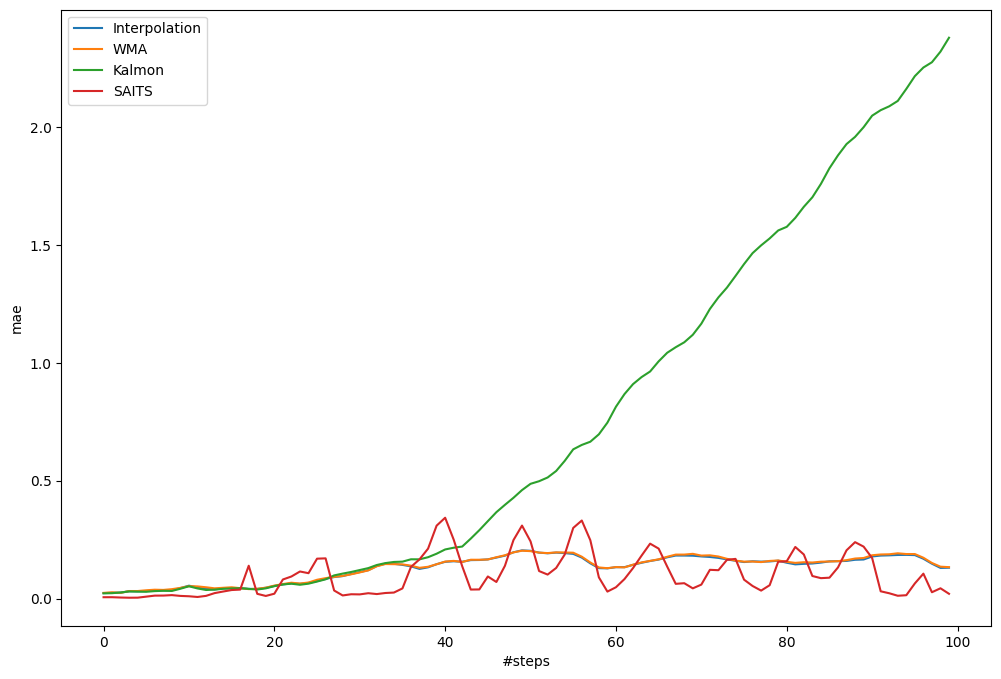

In [18]:
mae_report(y_true, y_pred_dbscan, lorenz)

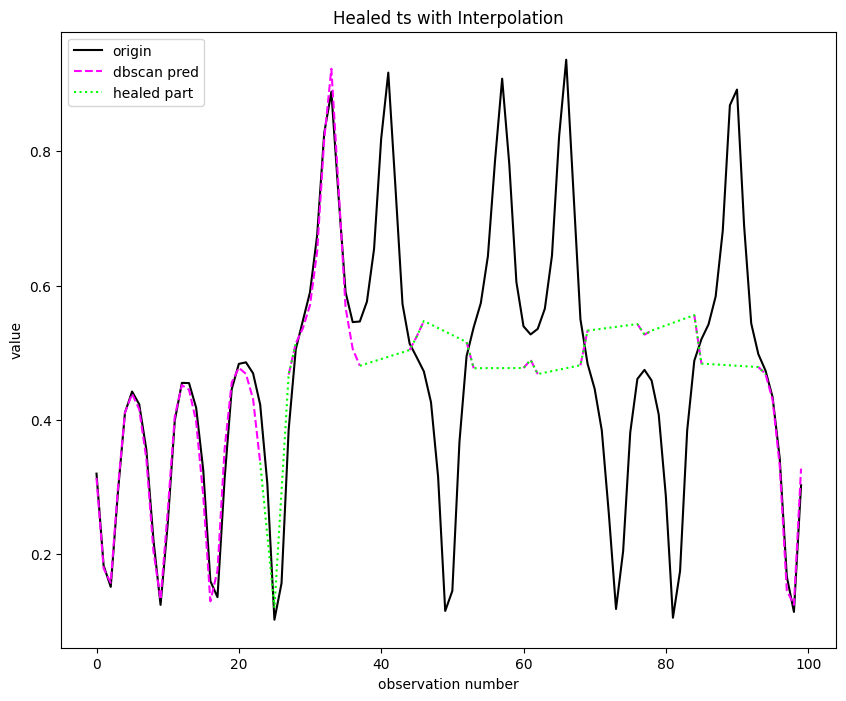

In [19]:
healed = healing(pd.DataFrame(np.append(lorenz, y_pred_dbscan[0]))[0], 'Interpolation')
plot_filled(y_pred_dbscan[0], y_true[0], healed, method_name='Interpolation', pred_name='dbscan')

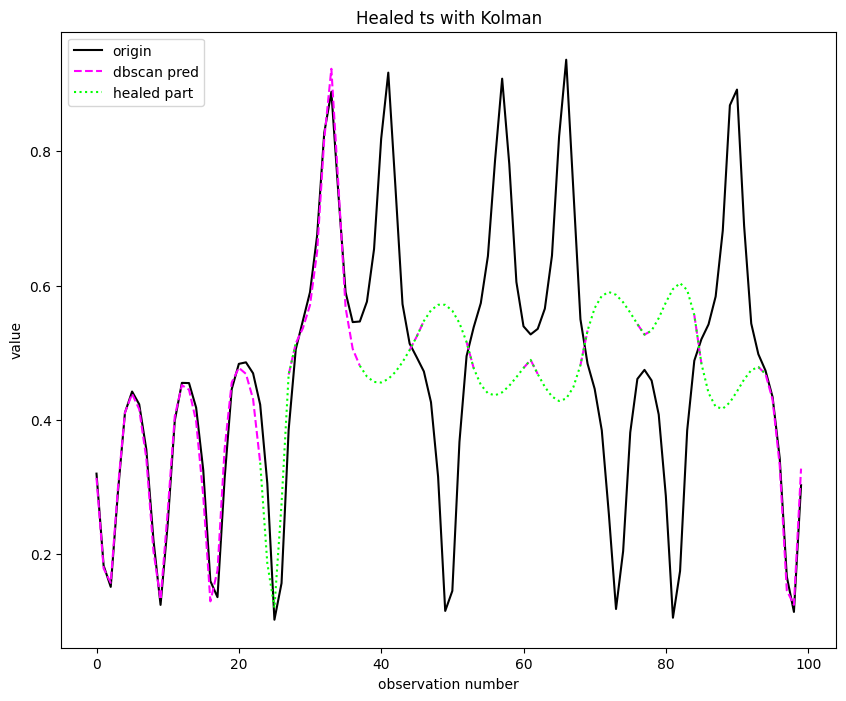

In [20]:
healed = healing(pd.DataFrame(np.append(lorenz, y_pred_dbscan[0]))[0], method='Kalmon')
plot_filled(y_pred_dbscan[0], y_true[0], healed, method_name='Kolman', pred_name='dbscan')

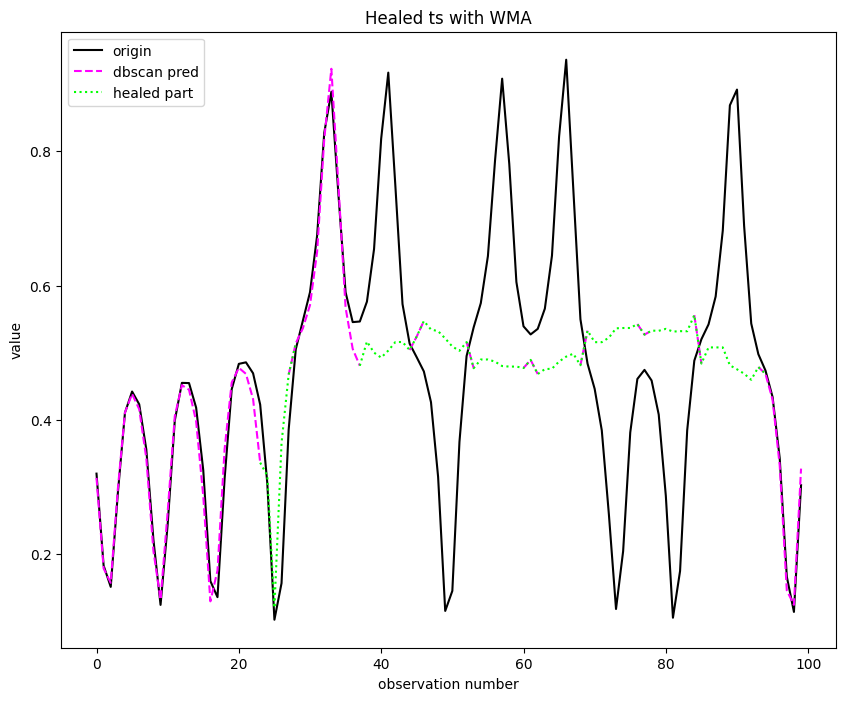

In [21]:
healed = healing(pd.DataFrame(np.append(lorenz, y_pred_dbscan[0]))[0], method='WMA')
plot_filled(y_pred_dbscan[0], y_true[0], healed, method_name='WMA', pred_name='dbscan')

2023-12-26 13:49:06 [INFO]: No given device, using default device: cpu
2023-12-26 13:49:06 [WARNING]: saving_path not given. Model files and tensorboard file will not be saved.
2023-12-26 13:49:06 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 1,328,506
2023-12-26 13:49:14 [INFO]: Epoch 001 - training loss: 1.1457
2023-12-26 13:49:23 [INFO]: Epoch 002 - training loss: 2.5808
2023-12-26 13:49:32 [INFO]: Epoch 003 - training loss: 1.8139
2023-12-26 13:49:41 [INFO]: Epoch 004 - training loss: 0.8226
2023-12-26 13:49:50 [INFO]: Epoch 005 - training loss: 1.2104
2023-12-26 13:49:59 [INFO]: Epoch 006 - training loss: 1.3014
2023-12-26 13:50:08 [INFO]: Epoch 007 - training loss: 0.9851
2023-12-26 13:50:17 [INFO]: Epoch 008 - training loss: 0.7454
2023-12-26 13:50:26 [INFO]: Epoch 009 - training loss: 0.8331
2023-12-26 13:50:35 [INFO]: Epoch 010 - training loss: 0.9349
2023-12-26 13:50:44 [INFO]: Epoch 011 - training loss: 0.8839
2023-12-26 13:50:

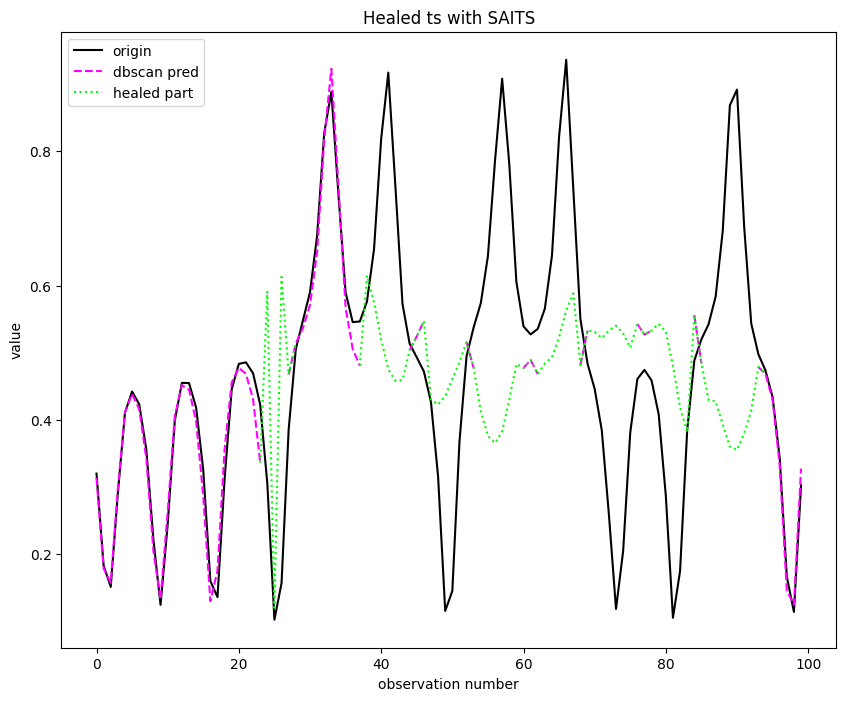

In [22]:
healed_saits_dbscan = healing(pd.DataFrame(np.append(lorenz, y_pred_dbscan[0]))[0], method='SAITS')
plot_filled(y_pred_dbscan[0], y_true[0], healed_saits_dbscan['imputation'].ravel(), method_name='SAITS', pred_name='dbscan')

## Entropy mode

In [17]:
y_pred_entropy = np.load("../data/y_pred_entropy_mode.npy")
y_pred_entropy.shape

(50, 100)

0.13231877560084734
0.13244323544558131


2023-12-26 13:52:59 [INFO]: No given device, using default device: cpu
2023-12-26 13:52:59 [WARNING]: saving_path not given. Model files and tensorboard file will not be saved.
2023-12-26 13:52:59 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 1,328,506


0.3911640441768896


2023-12-26 13:53:08 [INFO]: Epoch 001 - training loss: 0.6451
2023-12-26 13:53:18 [INFO]: Epoch 002 - training loss: 2.8972
2023-12-26 13:53:27 [INFO]: Epoch 003 - training loss: 1.8153
2023-12-26 13:53:36 [INFO]: Epoch 004 - training loss: 0.5501
2023-12-26 13:53:44 [INFO]: Epoch 005 - training loss: 0.9615
2023-12-26 13:53:53 [INFO]: Epoch 006 - training loss: 1.1082
2023-12-26 13:54:02 [INFO]: Epoch 007 - training loss: 0.7888
2023-12-26 13:54:11 [INFO]: Epoch 008 - training loss: 0.4441
2023-12-26 13:54:20 [INFO]: Epoch 009 - training loss: 0.5702
2023-12-26 13:54:29 [INFO]: Epoch 010 - training loss: 0.7056
2023-12-26 13:54:38 [INFO]: Epoch 011 - training loss: 0.6179
2023-12-26 13:54:47 [INFO]: Epoch 012 - training loss: 0.4445
2023-12-26 13:54:55 [INFO]: Epoch 013 - training loss: 0.4210
2023-12-26 13:55:04 [INFO]: Epoch 014 - training loss: 0.5217
2023-12-26 13:55:13 [INFO]: Epoch 015 - training loss: 0.5545
2023-12-26 13:55:22 [INFO]: Epoch 016 - training loss: 0.4879
2023-12-

0.08591442546647396


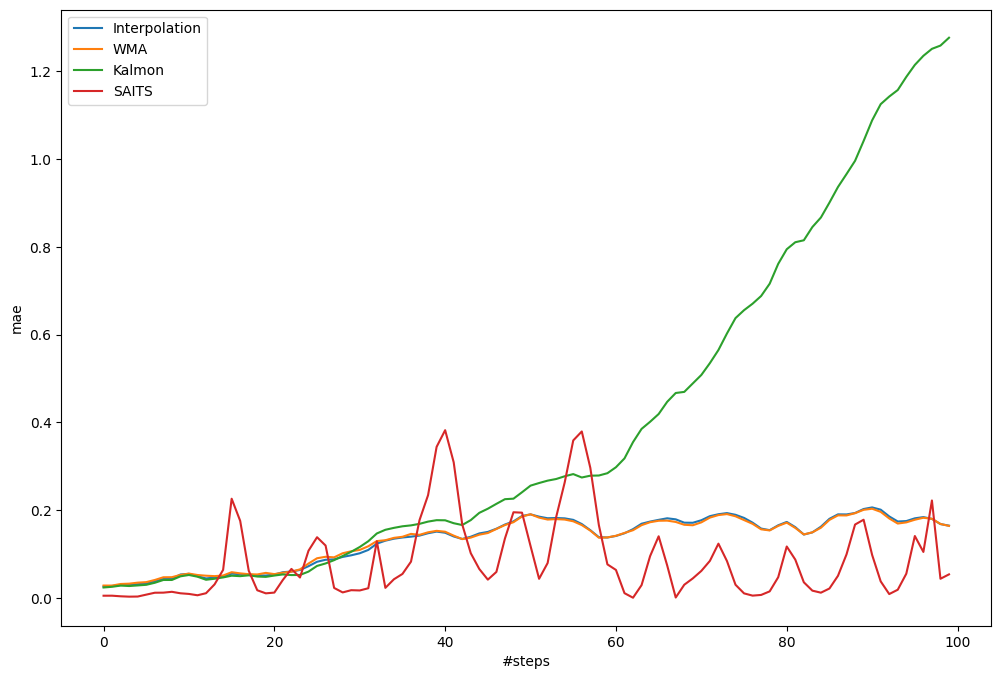

In [24]:
mae_report(y_true, y_pred_entropy, lorenz)

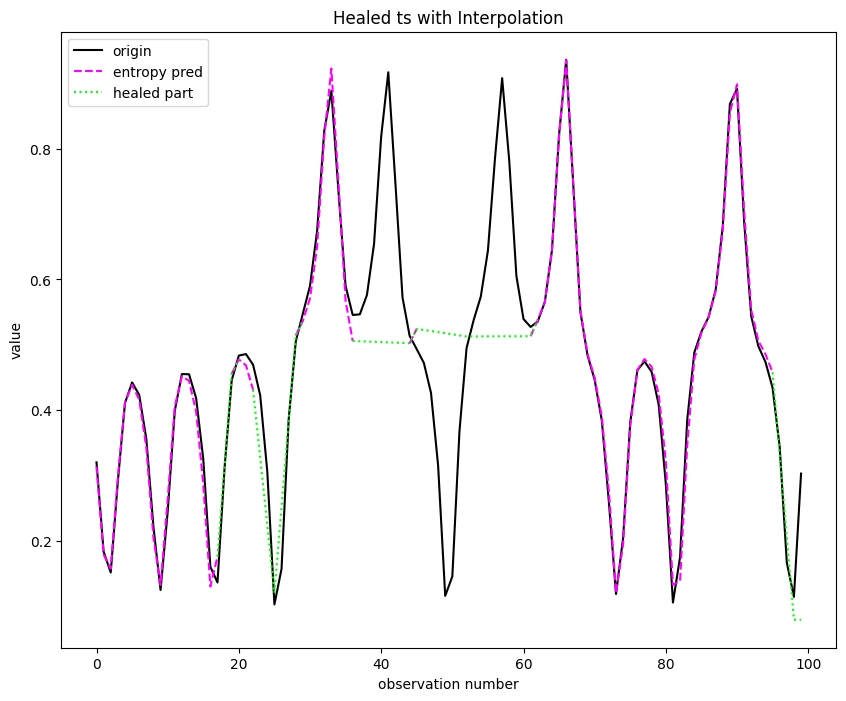

In [18]:
healed = healing(pd.DataFrame(np.append(lorenz, y_pred_entropy[0]))[0], 'Interpolation')
plot_filled(y_pred_entropy[0], y_true[0], healed, method_name='Interpolation')

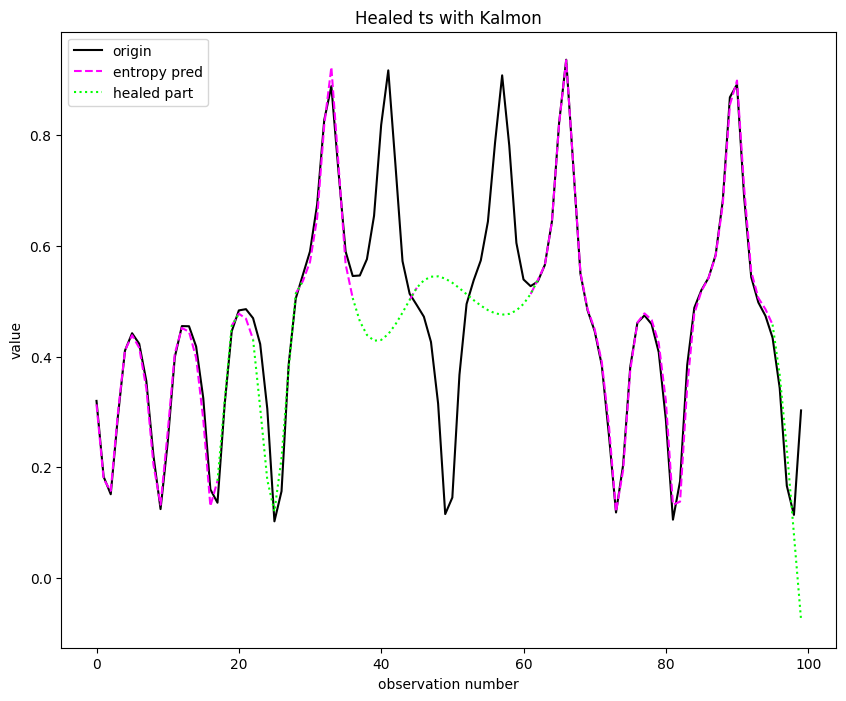

In [19]:
healed = healing(pd.DataFrame(np.append(lorenz, y_pred_entropy[0]))[0], method='Kalmon')
plot_filled(y_pred_entropy[0], y_true[0], healed, method_name='Kalmon')

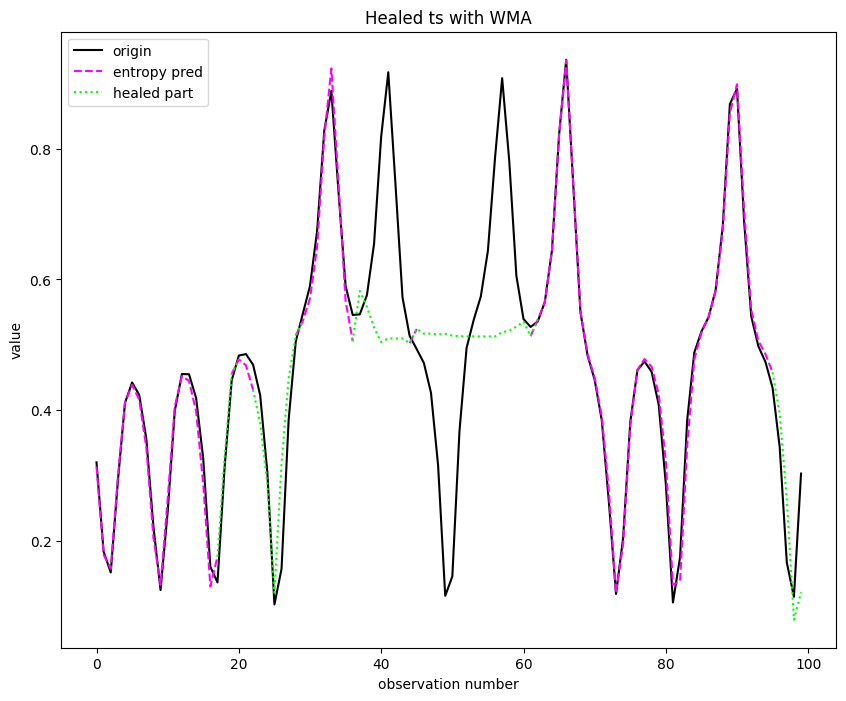

In [20]:
healed = healing(pd.DataFrame(np.append(lorenz, y_pred_entropy[0]))[0], method='WMA')
plot_filled(y_pred_entropy[0], y_true[0], healed, method_name='WMA')

2023-12-26 16:03:22 [INFO]: No given device, using default device: cpu
2023-12-26 16:03:22 [WARNING]: saving_path not given. Model files and tensorboard file will not be saved.
2023-12-26 16:03:22 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 1,328,506
2023-12-26 16:03:32 [INFO]: Epoch 001 - training loss: 1.3845
2023-12-26 16:03:41 [INFO]: Epoch 002 - training loss: 2.9266
2023-12-26 16:03:51 [INFO]: Epoch 003 - training loss: 1.7578
2023-12-26 16:04:00 [INFO]: Epoch 004 - training loss: 0.9870
2023-12-26 16:04:09 [INFO]: Epoch 005 - training loss: 1.2963
2023-12-26 16:04:19 [INFO]: Epoch 006 - training loss: 1.3320
2023-12-26 16:04:28 [INFO]: Epoch 007 - training loss: 1.0329
2023-12-26 16:04:37 [INFO]: Epoch 008 - training loss: 0.6676
2023-12-26 16:04:47 [INFO]: Epoch 009 - training loss: 0.7278
2023-12-26 16:04:56 [INFO]: Epoch 010 - training loss: 0.8350
2023-12-26 16:05:06 [INFO]: Epoch 011 - training loss: 0.5890
2023-12-26 16:05:

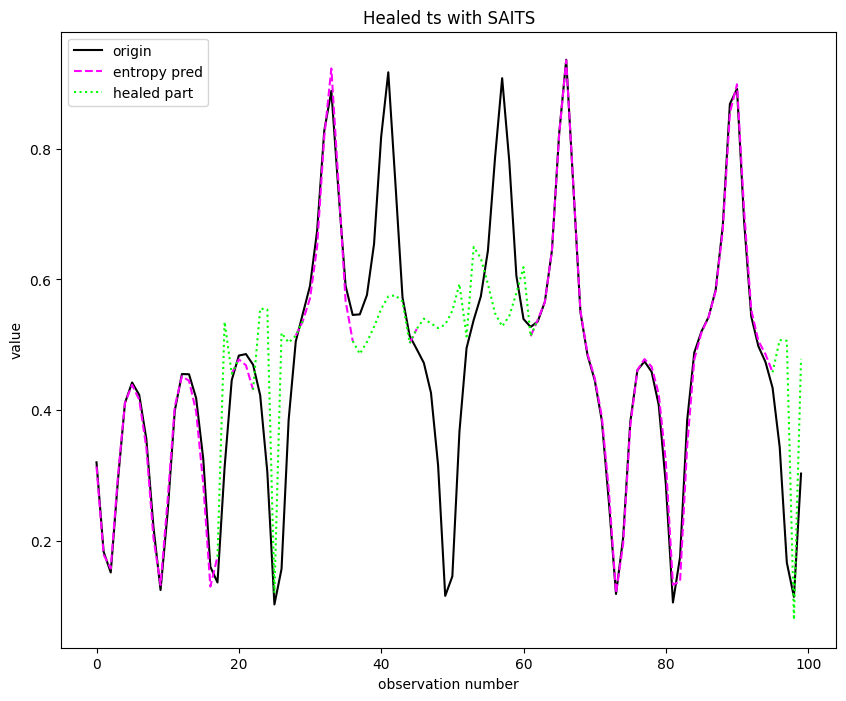

In [21]:
healed_saits_entropy = healing(pd.DataFrame(np.append(lorenz, y_pred_entropy[0]))[0], method='SAITS')
plot_filled(y_pred_entropy[0], y_true[0], healed_saits_entropy['imputation'].ravel(), method_name='SAITS')

## Bitcoin Entropy

In [23]:
from sklearn.preprocessing import MinMaxScaler

y_pred_bitcoin = np.load("../data/y_pred_bitcoin.npy")
y_true_bitcoin = np.load("../data/y_true_bitcoin.npy")
train_bicoin = np.load("../data/bitcoin_ts.npy")[:10000]
scaler = MinMaxScaler()
scaler.fit(train_bicoin.reshape(-1, 1))
train_bicoin = scaler.transform(train_bicoin.reshape(-1, 1)).ravel()

y_pred_bitcoin.shape, y_true_bitcoin.shape, train_bicoin.shape

((50, 50), (50, 50), (10000,))

159.7473719999998
157.75397264346972


2023-12-26 15:01:44 [INFO]: No given device, using default device: cpu
2023-12-26 15:01:44 [WARNING]: saving_path not given. Model files and tensorboard file will not be saved.
2023-12-26 15:01:44 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 1,328,456


160.24501499260813


2023-12-26 15:01:53 [INFO]: Epoch 001 - training loss: 0.7326
2023-12-26 15:02:02 [INFO]: Epoch 002 - training loss: 2.4685
2023-12-26 15:02:11 [INFO]: Epoch 003 - training loss: 1.2608
2023-12-26 15:02:20 [INFO]: Epoch 004 - training loss: 0.7998
2023-12-26 15:02:29 [INFO]: Epoch 005 - training loss: 1.0903
2023-12-26 15:02:39 [INFO]: Epoch 006 - training loss: 0.7794
2023-12-26 15:02:48 [INFO]: Epoch 007 - training loss: 0.4239
2023-12-26 15:02:57 [INFO]: Epoch 008 - training loss: 0.5870
2023-12-26 15:03:06 [INFO]: Epoch 009 - training loss: 0.6816
2023-12-26 15:03:15 [INFO]: Epoch 010 - training loss: 0.5224
2023-12-26 15:03:24 [INFO]: Epoch 011 - training loss: 0.4030
2023-12-26 15:03:33 [INFO]: Epoch 012 - training loss: 0.4436
2023-12-26 15:03:43 [INFO]: Epoch 013 - training loss: 0.4961
2023-12-26 15:03:52 [INFO]: Epoch 014 - training loss: 0.4585
2023-12-26 15:04:00 [INFO]: Epoch 015 - training loss: 0.3620
2023-12-26 15:04:10 [INFO]: Epoch 016 - training loss: 0.3084
2023-12-

258.7312376117722


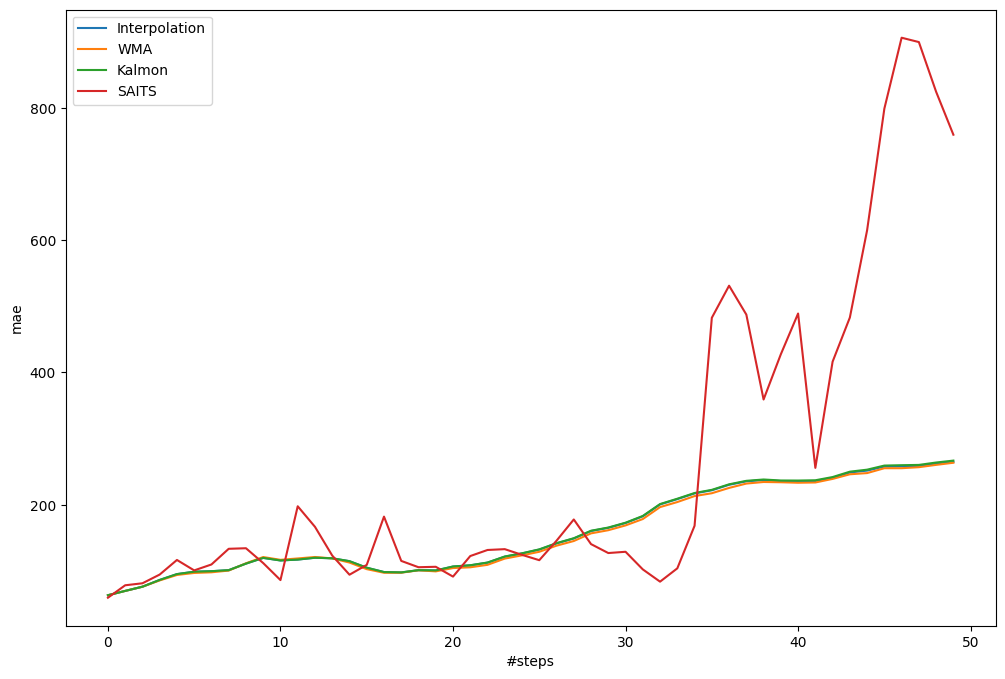

In [63]:
mae_report(y_true_bitcoin, y_pred_bitcoin, train_bicoin, scaler=scaler)

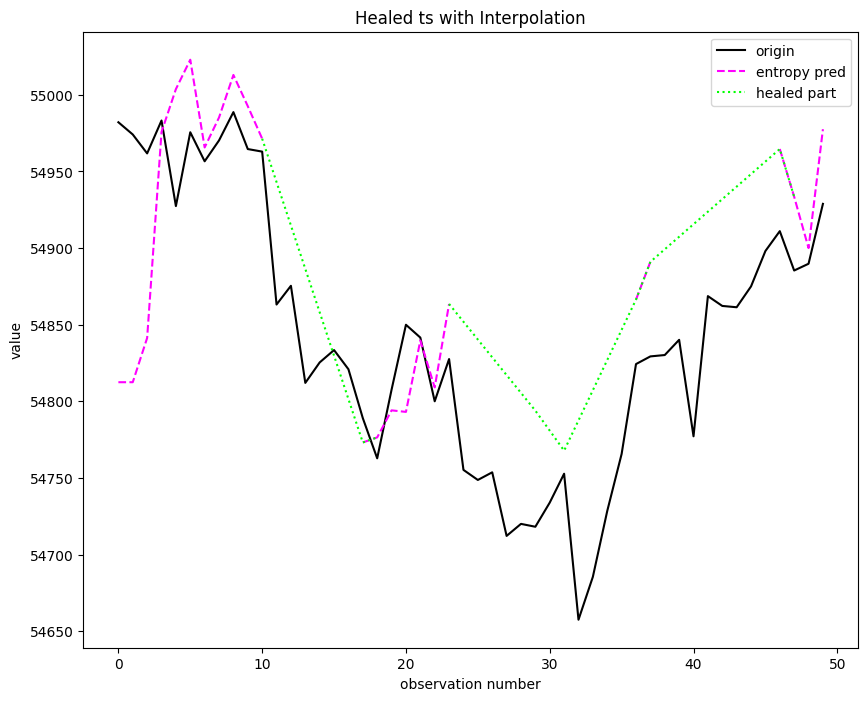

In [28]:
healed = healing(pd.DataFrame(np.append(train_bicoin, y_pred_bitcoin[0]))[0], 'Interpolation')
plot_filled(y_pred_bitcoin[0] - 0.035 , y_true_bitcoin[0], healed - 0.035, method_name='Interpolation', scaler=scaler)

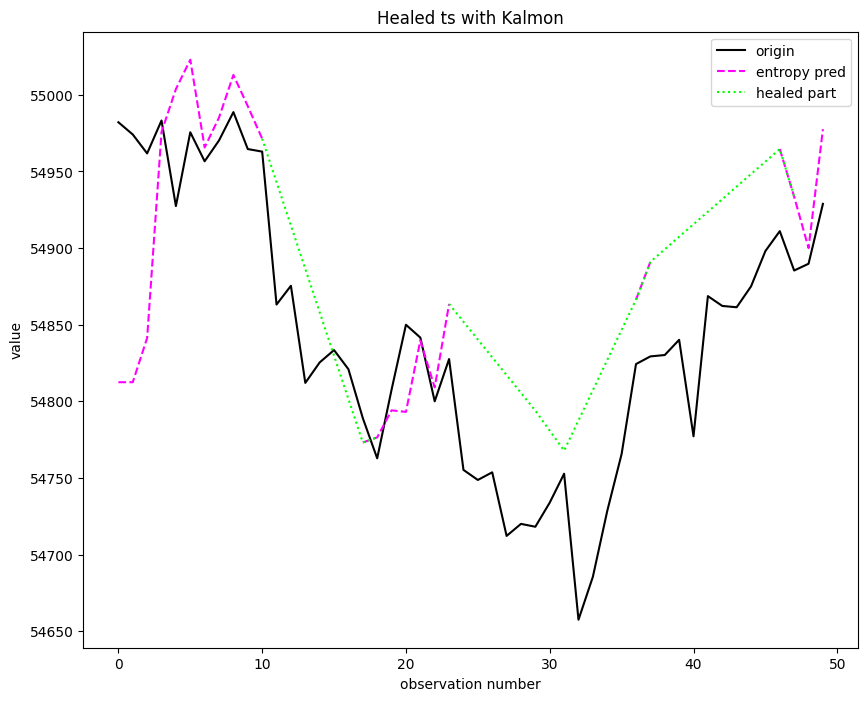

In [29]:
healed = healing(pd.DataFrame(np.append(train_bicoin, y_pred_bitcoin[0]))[0], 'Kalmon')
plot_filled(y_pred_bitcoin[0] - 0.035, y_true_bitcoin[0], healed - 0.035, method_name='Kalmon', scaler=scaler)

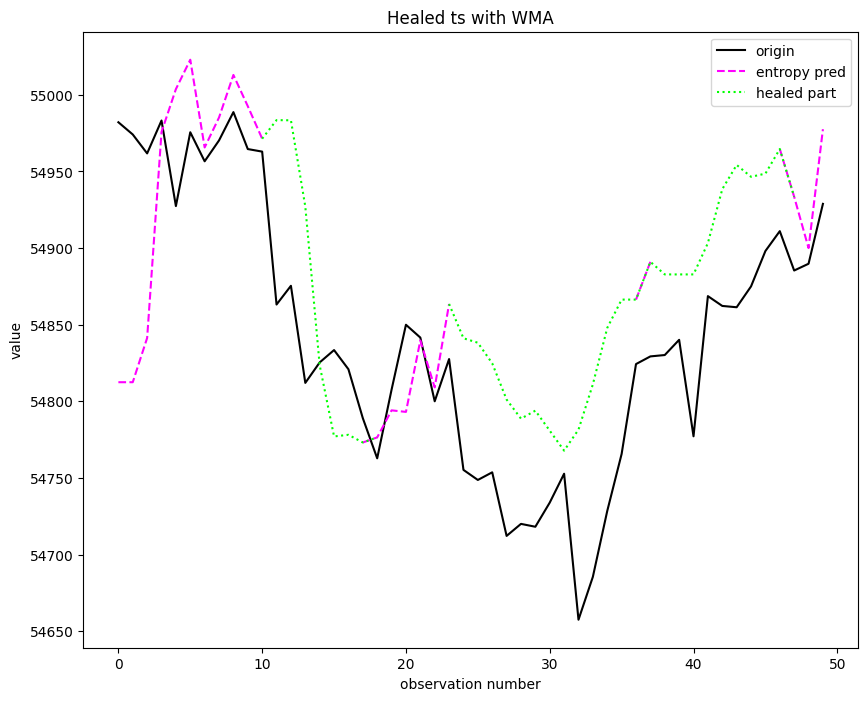

In [30]:
healed = healing(pd.DataFrame(np.append(train_bicoin, y_pred_bitcoin[0]))[0], 'WMA')
plot_filled(y_pred_bitcoin[0] - 0.035, y_true_bitcoin[0], healed- 0.035, method_name='WMA', scaler=scaler)

2023-12-26 16:17:22 [INFO]: No given device, using default device: cpu
2023-12-26 16:17:22 [WARNING]: saving_path not given. Model files and tensorboard file will not be saved.
2023-12-26 16:17:22 [INFO]: SAITS initialized with the given hyperparameters, the number of trainable parameters: 1,328,456
2023-12-26 16:17:32 [INFO]: Epoch 001 - training loss: 1.6772
2023-12-26 16:17:41 [INFO]: Epoch 002 - training loss: 3.6177
2023-12-26 16:17:50 [INFO]: Epoch 003 - training loss: 1.7940
2023-12-26 16:18:00 [INFO]: Epoch 004 - training loss: 1.1283
2023-12-26 16:18:09 [INFO]: Epoch 005 - training loss: 1.2768
2023-12-26 16:18:18 [INFO]: Epoch 006 - training loss: 1.3090
2023-12-26 16:18:28 [INFO]: Epoch 007 - training loss: 1.0684
2023-12-26 16:18:37 [INFO]: Epoch 008 - training loss: 0.9530
2023-12-26 16:18:46 [INFO]: Epoch 009 - training loss: 0.8132
2023-12-26 16:18:56 [INFO]: Epoch 010 - training loss: 0.6887
2023-12-26 16:19:05 [INFO]: Epoch 011 - training loss: 0.8097
2023-12-26 16:19:

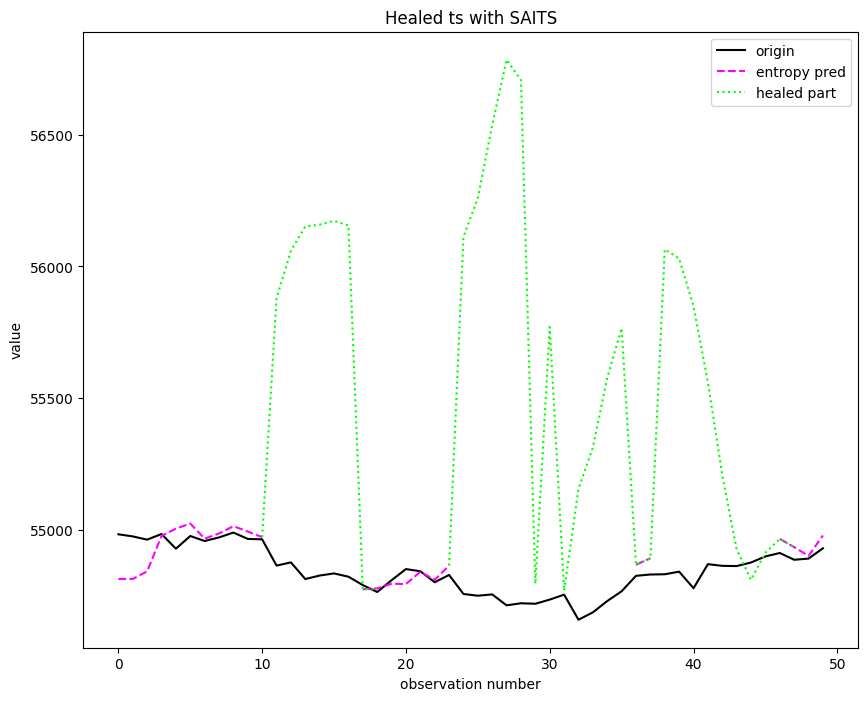

In [31]:
healed = healing(pd.DataFrame(np.append(train_bicoin, y_pred_bitcoin[0]))[0], 'SAITS')
plot_filled(y_pred_bitcoin[0] - 0.035, y_true_bitcoin[0], healed['imputation'].ravel()- 0.035, method_name='SAITS', scaler=scaler)